## Loading Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import os

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso

from sklearn.preprocessing import StandardScaler, PolynomialFeatures # automatically takes into account standardization

from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import LeaveOneOut, cross_val_score

The scale is 1-10 for quality wine

In [37]:
redwine = pd.read_csv('winequality-red.csv', sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [137]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
redwine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [128]:
print(redwine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Visualization

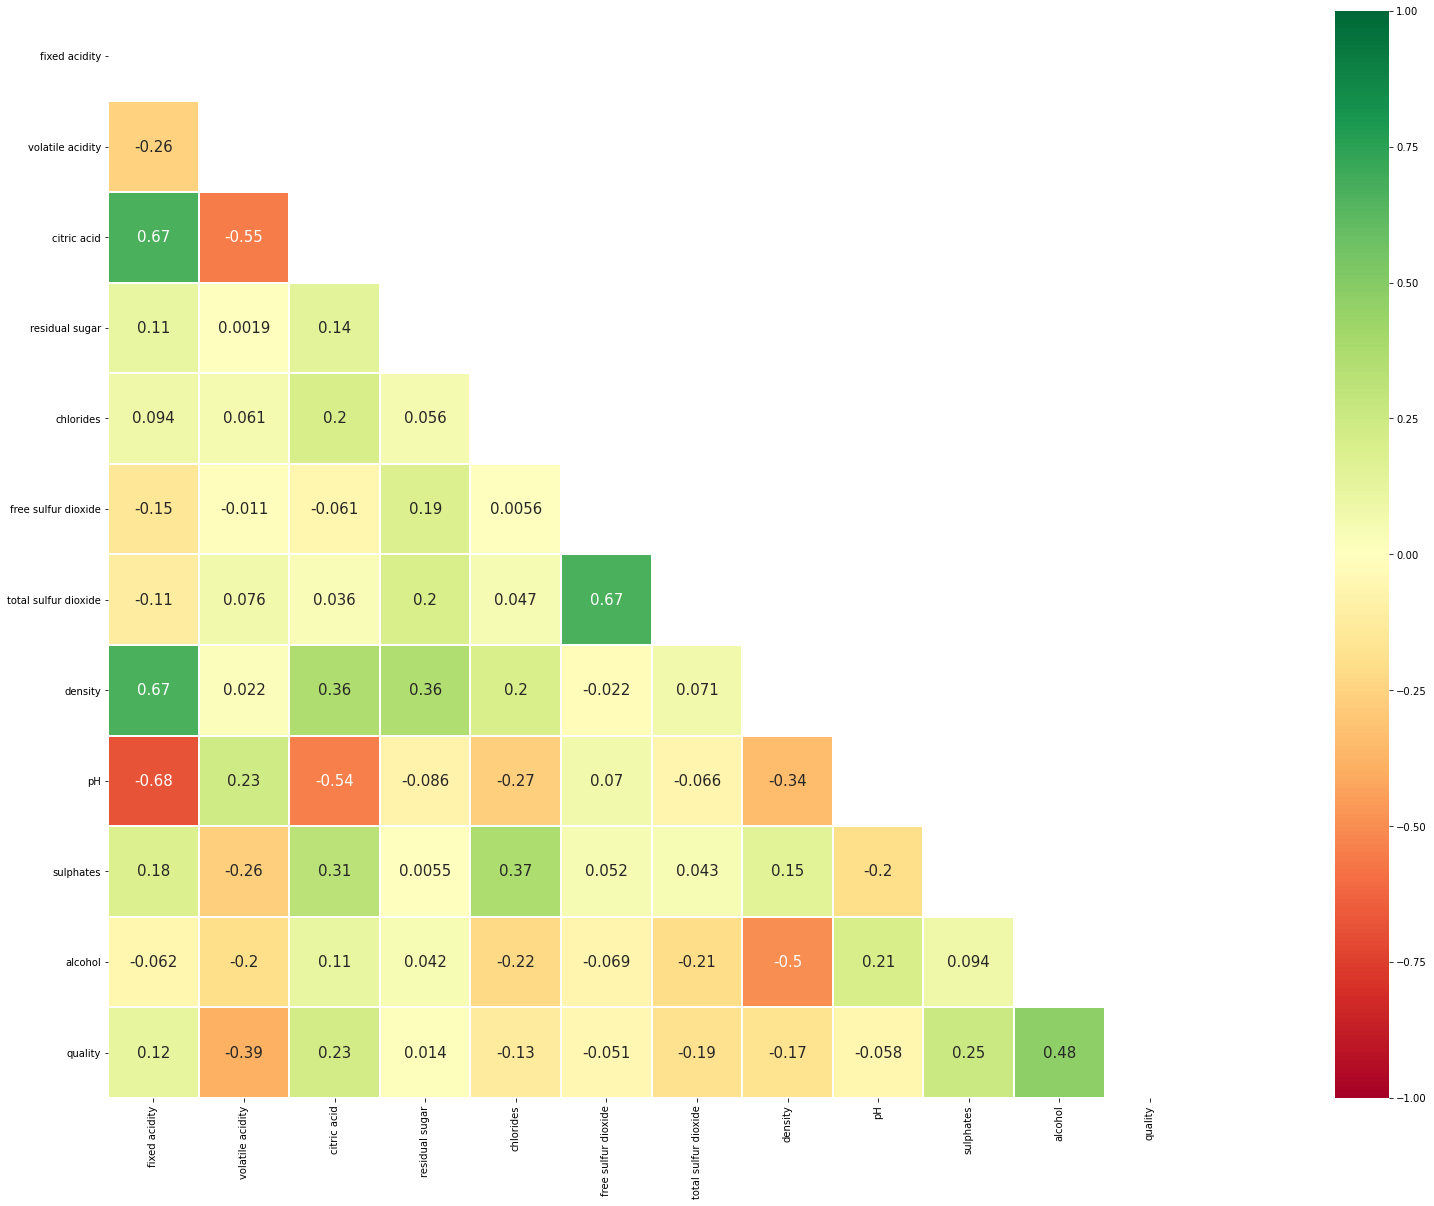

In [80]:
corr = redwine.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (50,20))

sns.heatmap(corr, mask = mask, cmap=plt.cm.RdYlGn, annot=True, fmt = '0.2g', linewidths=1, square=True, vmin=-1, vmax=1, annot_kws={"size":15}) # designed
plt.show()

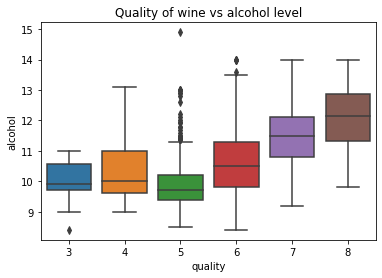

In [73]:
sns.boxplot(data=redwine, x='quality', y='alcohol')
plt.title("Quality of wine vs alcohol level");
plt.show()

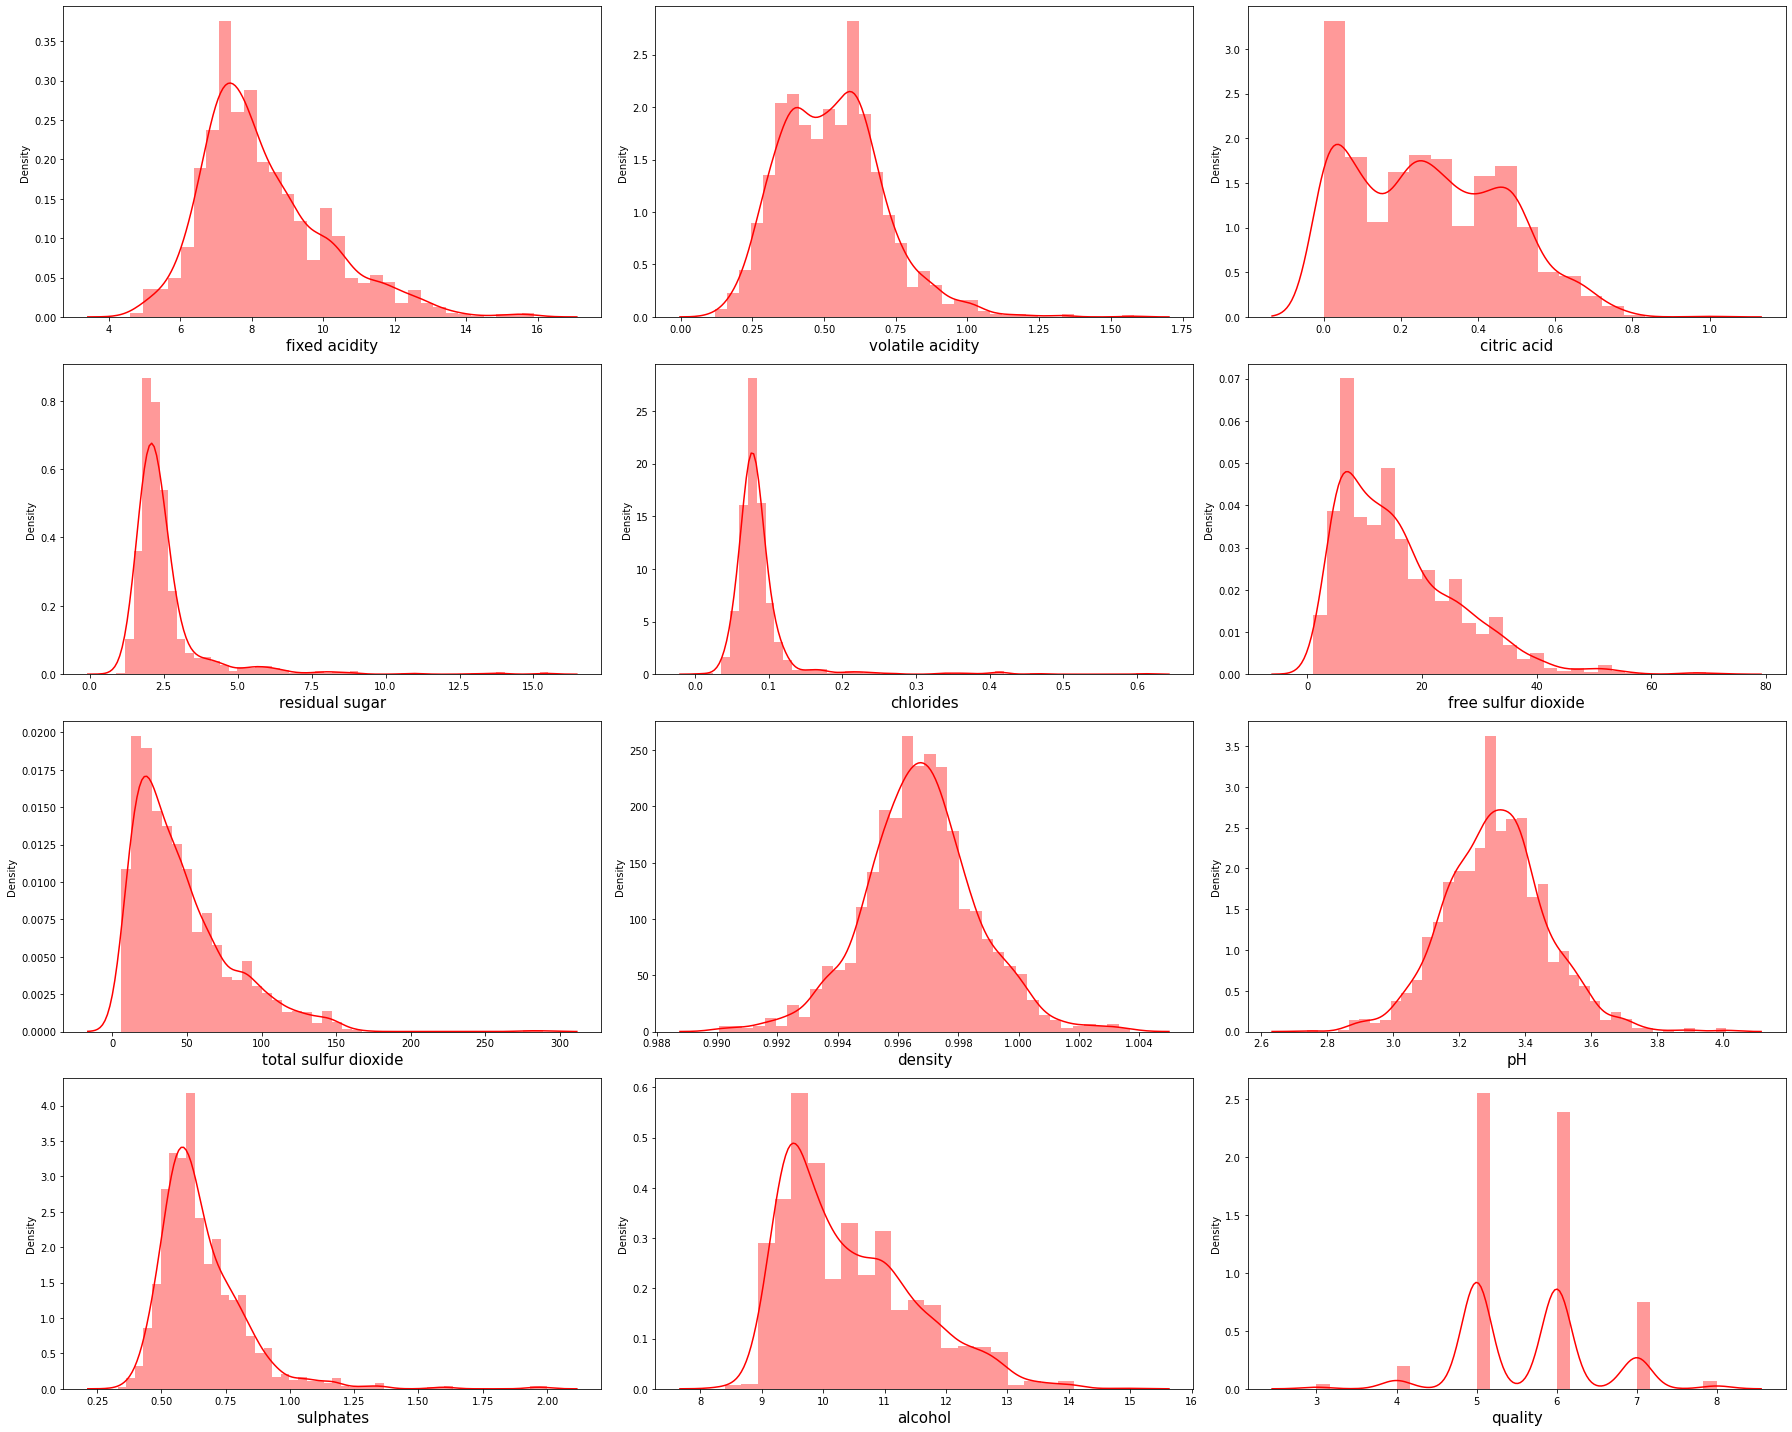

In [79]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in redwine:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(redwine[col], color='red')
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Preparing the data

First we are preparing the data by splitting the data with training and test set

In [174]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

In [175]:
X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

len(X) # Size of the dataset
len(X_train) # Size of the training set
len(X_test) # Size of the test set (In this case 25% of the dataset)

400

In [176]:
redwine[features]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Creating the models
- Linear regression (no hyperparameters)
- Quadratic regression (no hyperparameters)
- Quadratic regression with LASSO (1 hyperparameter)

In [177]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # automatically takes into account standardization

from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

In [178]:
# Linear regression
linreg = make_pipeline(StandardScaler(), LinearRegression() 
)

# Quadratic regression
quadreg = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
LinearRegression() 
)

# Quadratic regression with LASSO
quadlasso_empty = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
Lasso(max_iter=10000)
)

## Hold out method

In [180]:
linreg.fit(X_train, y_train) # fitting linear regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [181]:
quadreg.fit(X_train, y_train) # fitting the quadratic regression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [111]:
quadlasso_empty.get_params() # tells us all the parameters that we have

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('polynomialfeatures', PolynomialFeatures()),
  ('lasso', Lasso(max_iter=10000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'lasso': Lasso(max_iter=10000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 10000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [182]:
grid = {'lasso__alpha': np.logspace(-3, 0, 20)}
# Log space tells it how many parameters to try. The first number: lowest value, second number: highest value, third number how many we want to generate

holdout = ShuffleSplit(test_size=.25, n_splits=1, random_state=0) # validation method holdout

In [183]:
quadlasso = GridSearchCV(estimator = quadlasso_empty, 
param_grid = grid, 
cv = holdout, 
scoring = 'neg_mean_squared_error' # negative to understand which is the best value
)

quadlasso.fit(X_train, y_train) #automatically refits

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])},
             scoring='neg_mean_squared_error')

# Model Selection

**Mean Squared Error Method**

The lowest with the test-training split is MSE is the linear model. 

In [184]:
mean_squared_error(y_test, linreg.predict(X_test))

0.4000725270850547

In [185]:
mean_squared_error(y_test, quadreg.predict(X_test))

0.40863609033924075

In [186]:
mean_squared_error(y_test, quadlasso.predict(X_test))

0.4018485289397167

### Re-run model with entire data set

In [187]:
winner =  linreg

winner.fit(X, y)
mean_squared_error(y, linreg.predict(X))

0.416767167221408

### Predict out-of-sample data

# Validation model

## Leave on out method

Suggests lasso is the best model

In [188]:
def get_mse(model):
  mses = cross_val_score(estimator=model,
  X=X, 
  y=y, 
  cv=LeaveOneOut(),
  scoring='neg_mean_squared_error'
  )
  return np.average(-mses) # takes the average of the mean square errors

In [189]:
get_mse(linreg)

0.42477530645169154

In [190]:
get_mse(quadreg)

0.4253085735232858

In [340]:
grid = {'lasso__alpha': np.logspace(-3, 0, 4)}

quadlasso = GridSearchCV(estimator = quadlasso_empty, 
param_grid=grid, 
cv=LeaveOneOut(), scoring='neg_mean_squared_error',
n_jobs=4 
)

In [192]:
get_mse(quadlasso)

KeyboardInterrupt: 

## K-Fold Cross validation

k=5. Suggests lasso is the best model


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

def get_mse(model):
  mses = cross_val_score(estimator=model, X=X, y=y, cv=kfold, scoring='neg_mean_squared_error')
  return np.average(-mses)

In [ ]:
get_mse(linreg)

In [150]:
get_mse(quadreg)

0.4262015366329341

In [346]:
grid = {'lasso__alpha': np.logspace(-3,0,4)}

quadlasso = GridSearchCV(estimator=quadlasso_empty, 
                         param_grid=grid, 
                         cv=kfold, 
                         scoring='neg_mean_squared_error'
                        )

In [151]:
get_mse(quadlasso)

0.413864909609899

### Re-run model with entire data set

In [348]:
quadlasso_empty.get_params() # tells us all the parameters that we have
quadlasso = GridSearchCV(estimator = quadlasso_empty, 
param_grid = grid, 
cv = LeaveOneOut(), 
scoring = 'neg_mean_squared_error' # negative to understand which is the best value
)

quadlasso.fit(X_train, y_train) #automatically refits

quadlasso_empty.get_params() # tells us all the parameters that we have

KeyboardInterrupt: 

In [ ]:
winner = quadlasso.best_estimator_ # selects the best hyper parameter

winner.fit(X, y)

In [ ]:
mean_squared_error(winner.fit)

# Classification method

## Preparing the data

In [291]:
# Loading Packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [323]:
label = 'quality'
features = [column for column in redwine.columns if column != label]

X = redwine[features]
y = redwine[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## 1-vs-1 method

In [ ]:
model1vs1 = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=100000, random_state=0)).fit(X_train, y_train)

In [ ]:
f1_score(y_test, model1vs1.predict(X_test), average='micro')

## 1-vs-All method

In [202]:
model1vsRest = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=100000,random_state=0)).fit(X_train, y_train)

In [204]:
f1_score(y_test, model1vsRest.predict(X_test), average='micro')

0.5825

# Training the Model with K-Fold Cross Validation

In [324]:
models = [
    {
        'name': 'Multinomial Logistic Regression',
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000, random_state=0),
        'params': {
            'C': np.logspace(-3, 0, 25)
        }
    },
    {
        'name': 'OnevsOne LogReg',
        'model': OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)),
        'params': {
        }
    },
    {
        'name': 'OnevsRest LogReg',
        'model': OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)),
        'params': {
        }
    },
    {
        'name' : 'Decision Tree Classifier',
        'model' : DecisionTreeClassifier(random_state=0),
        'params' : {
            'max_depth' : [8,16,24,32]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [20, 50, 100, 200, 400]
        }
    }
]

In [325]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for m in models:
    pipeline = make_pipeline(
        StandardScaler(),
        GridSearchCV(
            estimator=m['model'],
            param_grid=m['params'],
            scoring='f1_micro',
            n_jobs=-1,
            cv=kfold
        )
    )
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    m['score'] = f1_score(y_test, predictions, average='micro')
    m['pipeline'] = pipeline

In [326]:
print('The F1 scores of the models are provided found through K-Vold Validation')

for m in models:
    print(f"Model: {m['name']}: score = {m['score']:.3f}")

The F1 scores of the models are provided found through K-Vold Validation
Model: Multinomial Logistic Regression: score = 0.600
Model: OnevsOne LogReg: score = 0.603
Model: OnevsRest LogReg: score = 0.595
Model: Decision Tree Classifier: score = 0.635
Model: Random Forest: score = 0.705


The best model is the one with the best F1 score. In this case, this would be the random forest model with a score of 0.7050.

In [318]:
models = pd.DataFrame({
    'Model' : ['Multinomial Logistic Regression', 'OnevsOne LogReg', 'OnevsRest LogReg', 'Decision Tree Classifier', 'Random Forest'],
    'Score' : [ 0.600, 0.603, 0.595, 0.635, 0.705]
    })

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.705
3,Decision Tree Classifier,0.635
1,OnevsOne LogReg,0.603
0,Multinomial Logistic Regression,0.600
2,OnevsRest LogReg,0.595


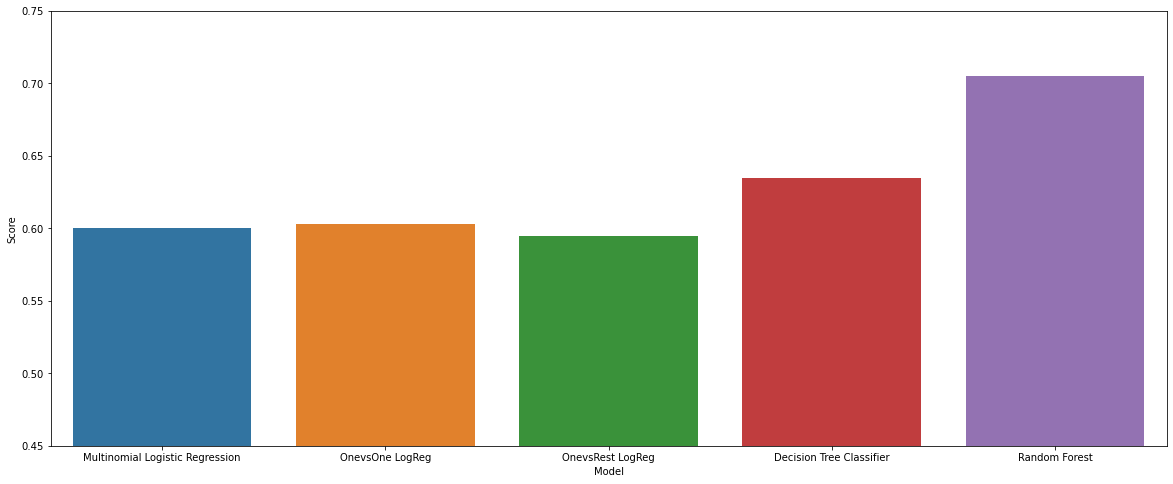

In [319]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.45, 0.75)
plt.show()

## Making predictions with the whole data set

In [247]:
winner = RandomForestClassifier(random_state=42, n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=10, bootstrap=False)
winner.fit(X_train, y_train)
f1_score(y_test, winner.predict(X_test), average='micro')

0.7175

In [339]:
y_pred=winner.predict(X_test)

A=np.array(y_test)
B=np.array(y_pred)
C=np.array(y_test == y_pred)
dataset = pd.DataFrame({'y_test': A, 'y_pred': B, 'correct' : C}, columns=['y_test', 'y_pred', 'correct'])
dataset

,y_test,y_pred,correct
0,6,7,False
1,5,5,True
2,7,6,False
3,6,6,True
4,6,6,True
...,...,...,...
395,5,5,True
396,7,6,False
397,7,7,True
398,6,6,True


The conclusion is that there are such things as good and bad wines. There are specific differences between bottles of wines depending on the variables in this dataset. The main drivers of variance are alcohol percentage and volatile acidity. Based on these objective attributes we can predict wine quality with an accuracy of 71.75%. The scoring is based on rates given by experts in a blind trial. 

When treating the scoring as discrete variables and performing a classification model, we found that the random forest method is the best. Through the regression problem, we found that the quadratic lasso model performed the best. 